<a href="https://colab.research.google.com/github/Said-Abdullahi/-Machine-Learning-Projects/blob/main/SIT720_A3_221377847.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#  Name:Said Abdullahi
#  SIT720:  Assessment Task 3
#  Student ID: 221377847
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
#Install packages
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

# 1. Load and explore the training dataset. Explain the steps that you have taken. (6 marks)

In [ ]:
# Uploads and read the data into a pandas DataFrame.
data_file_training ='/content/ac_train_data.csv'
data_file_test ='/content/ac_test_data.csv'


#function to read the data into a pandas DataFrame.
def upload_data(file_name):
    '''
    Uploads the data into a pandas DataFrame.
    '''
    #Making a list of missing value types to be replaced with NaN
    # note zero is not considered a missing value
    missing_values = ["null", "nan", "?", "N/A", "na", "n/a", "", " "]
    df=read_csv(file_name,dtype={'ac':bool,'dayofweek':"category" },
    na_values=missing_values , low_memory=False)
    return df
#function to preprocess the data
def preprocess_data(df):
    '''
    Preprocesses the data.
    '''
    #make dayofweek categorical
    #df['dayofweek']=df['dayofweek'].astype('category')
    #Dropping the nan values
    df.dropna(inplace=True)
    #Dropping the columns with too many missing values
    #renaming the column unnamed to id
    df.rename(columns={'Unnamed: 0':'id'}, inplace=True)
    #move the column 'ac' to the first column
    df = df.reindex(columns=['ac','id','load','hourofday','dayofweek','dif','absdif','max','var','entropy','nonlinear','hurst'])
    #change the categorical data to numeric
    df['dayofweek']=df['dayofweek'].cat.codes
    return df

In [ ]:
# upload training data into a pandas DataFrame.
df=(upload_data(data_file_training)
                .pipe(preprocess_data)            )

# upload test data
df_test=(upload_data(data_file_test)
                            .pipe(preprocess_data)

)

# Print dataframe information
print(df.head())
print('*'*100)
print(df.shape)
print('*'*100)
print(df.info())

**Basic statistics of numerical columns**

In [ ]:
#initialize the feature and target columns needed
drop_col = ['id']
drop_col_1 = ['ac']
#drop id from dataframe
df = df.drop(columns=drop_col)
#Seperate the features and target column
features = df.drop(columns=drop_col_1)
target = df['ac']

In [ ]:
#Descriptive statistics
# hourofday	and dayofweek are categorical. There is no meaning
df.describe()

,load,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
count,417720.000000,417720.000000,417720.000000,4.177200e+05,417720.000000,417720.000000,417720.000000,417720.000000,417720.000000,417720.000000
mean,2.184664,11.484487,3.013646,-7.038207e-07,0.159578,3.977086,1.871247,0.707766,1.468806,0.972744
std,1.890565,6.920358,2.001499,5.309284e-01,0.506379,2.131094,1.787633,0.094367,2.610744,0.065439
min,0.298000,0.000000,0.000000,-7.970000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.807000,5.000000,1.000000,-1.100000e-02,0.002000,1.786000,0.077337,0.645582,0.271757,0.987936
50%,1.279000,11.000000,3.000000,-1.000000e-03,0.010000,4.652000,1.984612,0.676446,0.698592,0.992059
75%,3.358000,17.000000,5.000000,8.000000e-03,0.043000,5.446000,3.508556,0.740986,1.598501,0.993138
max,11.794000,23.000000,6.000000,7.619000e+00,7.970000,11.794000,16.344863,0.999987,54.611741,0.996802


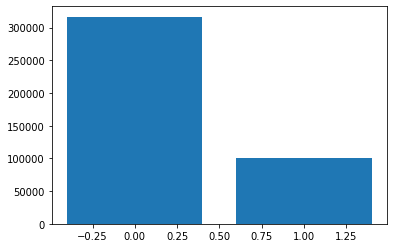

**************************************************
False is 0 and True 1 : False    316521
True     101199
Name: ac, dtype: int64


In [ ]:
#plot ac
counts = df["ac"].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

print('*'*50)
print('False is 0 and True 1 :',df['ac'].value_counts())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


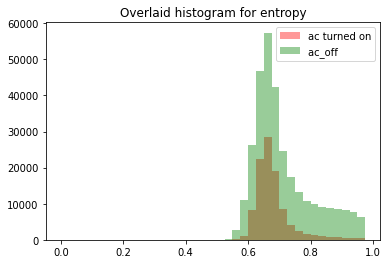

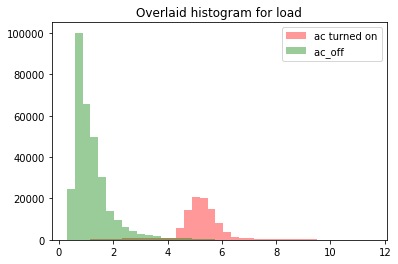

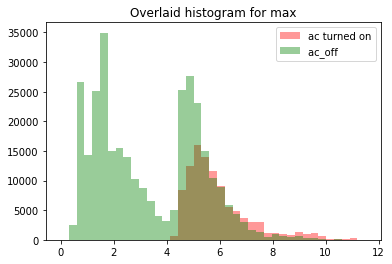

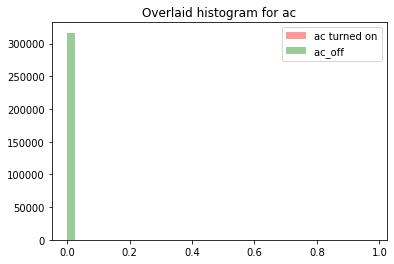

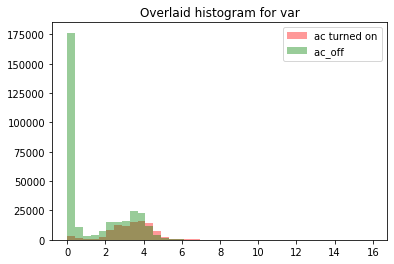

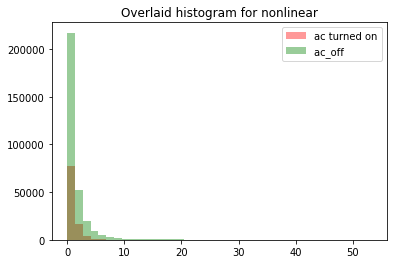

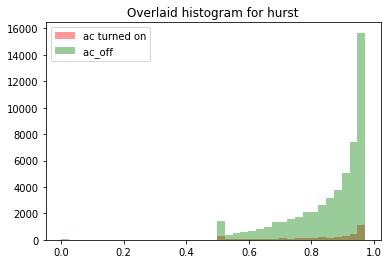

In [ ]:
# Plot overlaid histograms for continuous features
import seaborn as sns
for i in ['entropy','load', 'max', 'ac','var','nonlinear','hurst']:
    ac_off = list(df[df['ac'] == 0][i].dropna())
    ac_on = list(df[df['ac'] == 1][i].dropna())
    xmin = min(min(ac_on), min(ac_off))
    xmax = max(max(ac_on), max(ac_off))
    width = (xmax - xmin) / 40
    sns.distplot(ac_on, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(ac_off, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['ac turned on', 'ac_off '])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

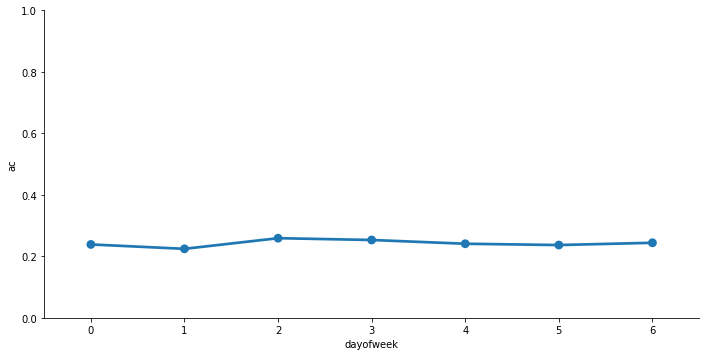

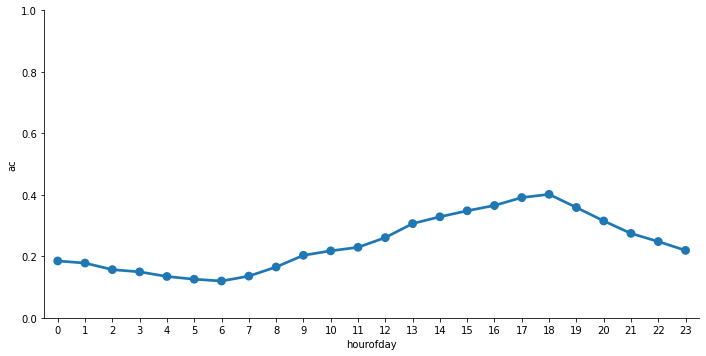

In [ ]:
# Generate categorical plots for ordinal features
for col in ['dayofweek','hourofday']:
    sns.catplot(x=col, y='ac', data=df, kind='point', aspect=2, )
    plt.ylim(0, 1)

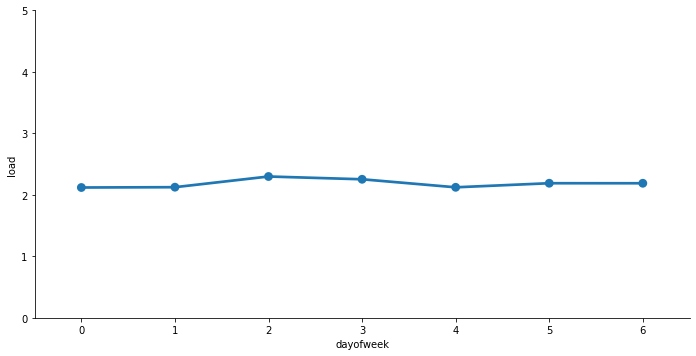

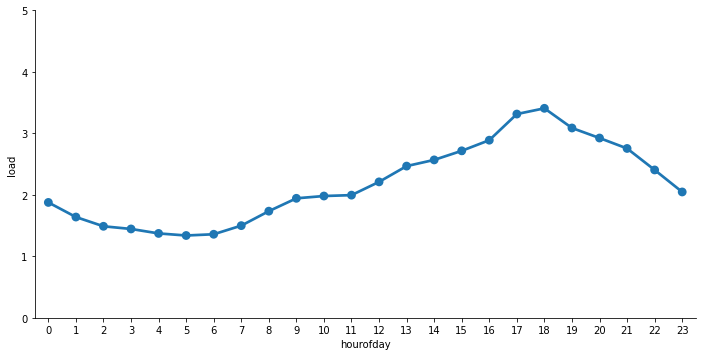

In [ ]:
# Generate categorical plots for ordinal features
for col in ['dayofweek','hourofday']:
    sns.catplot(x=col, y='load', data=df, kind='point', aspect=2, )
    plt.ylim(0, 5)

# 2. Analyse the importance of the features for predicting air conditioner status using two different approaches. (6 marks)

**First method of feature importance using Pearson Correlation**

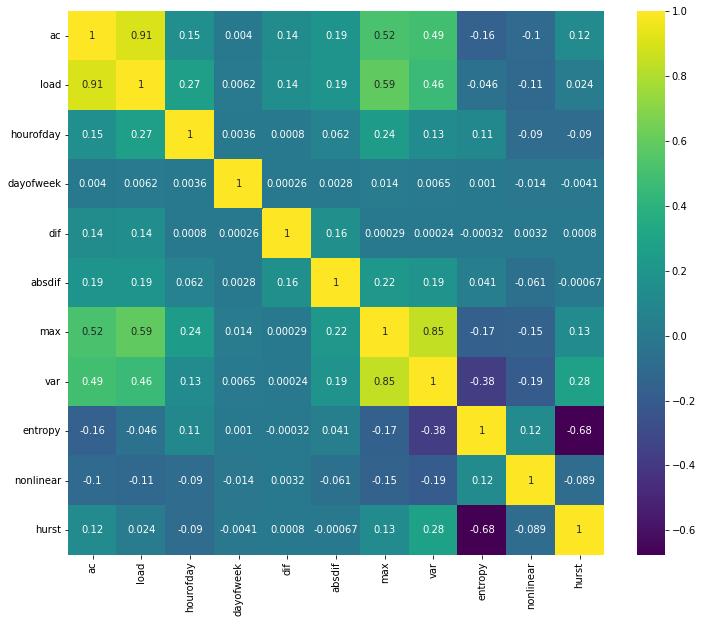

In [ ]:
#First method of feature importance using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.viridis)
plt.savefig('correlation.pdf')
plt.show()

**Second method of feature importance using Random Forest**

In [ ]:
#Second method of feature importance using Random Forest

rfclf = RandomForestClassifier(n_estimators=300, max_depth=3)#, #random_state=42)
#fit the model
rfclf.fit(features, target)

RandomForestClassifier(max_depth=3, n_estimators=300)

In [ ]:
#Feature columns and importance
features_cols = ['load', 'hourofday', 'dayofweek', 'dif', 'absdif', 'max', 'var', 'entropy', 'nonlinear', 'hurst']
print(rfclf.feature_importances_)

[6.17765320e-01 7.70171958e-03 1.30088406e-05 2.09771481e-02
 3.88219088e-02 1.74111529e-01 1.25719664e-01 5.73200239e-03
 3.08918651e-05 9.12680717e-03]


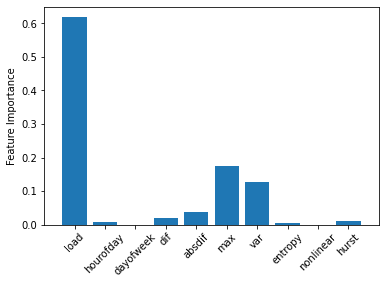

In [ ]:
#Plot the feature importance
n = len(features_cols)
plt.bar(range(0,n),rfclf.feature_importances_)
#put the feature names in x_axis
plt.xticks(range(0,n), features_cols, rotation=45)
plt.xlim([-1, n])
plt.ylabel("Feature Importance")
plt.savefig('graph.pdf')
plt.show()

# 3. Based on the training data, create three supervised machine learning (ML) models except any ensemble approach for predicting air conditioner status.

In [ ]:
#Create and seperate the features and target/response using feature importance.

#For the training set
X_train = df[['load', 'max']]
y_train = df['ac']

#For the test set
X_test = df_test[['load', 'max']]
y_test = df_test['ac']

print(X_train)
print('*'*50)
print(y_train)
print('*'*50)
print(X_test)
print('*'*50)
print(y_test)


**Baseline Logistics model**

In [ ]:
# Test the logistic regression classifier
classifier = LogisticRegression()

# Fit the classifier
classifier.fit(X_train, y_train)


print('Accuracy Score for training data :',accuracy_score(y_train,classifier.predict(X_train)))
print('Accuracy Score for test data :',accuracy_score(y_test, classifier.predict(X_test)))

Accuracy Score for training data : 0.9755434262185195
Accuracy Score for test data : 0.9789937464468448


In [ ]:
# Classification report
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99     96221
        True       0.84      0.93      0.89      9319

    accuracy                           0.98    105540
   macro avg       0.92      0.96      0.94    105540
weighted avg       0.98      0.98      0.98    105540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


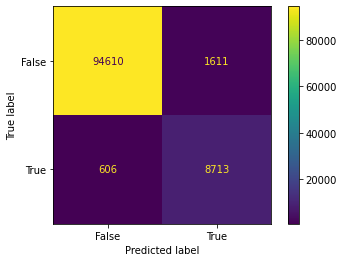

In [ ]:
# confusion_matrix
plot_confusion_matrix(classifier.fit(X_train, y_train), X_test, y_test)

plt.show()

**Baseline Naive Bayes Model**

In [ ]:
# Test the naive bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

print('Accuracy Score for training data :',accuracy_score(y_train,classifier.predict(X_train)))
print('Accuracy Score for test data :',accuracy_score(y_test, classifier.predict(X_test)))

Accuracy Score for training data : 0.9711409556640812
Accuracy Score for test data : 0.9757816941444002


In [ ]:
#Classification report
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99     96221
        True       0.81      0.96      0.87      9319

    accuracy                           0.98    105540
   macro avg       0.90      0.97      0.93    105540
weighted avg       0.98      0.98      0.98    105540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


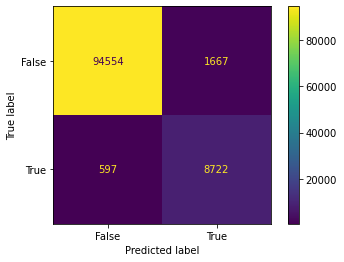

In [ ]:
# confusion_matrix
plot_confusion_matrix(classifier.fit(X_train, y_train), X_test, y_test)
plt.show()

**Baseline k-Nearest Neighbours Model**

In [ ]:
# Test the k-nearest neighbours classifier
classifier = KNeighborsClassifier()
# Fit the classifier
classifier.fit(X_train, y_train)

print('Accuracy Score for training data :',accuracy_score(y_train,classifier.predict(X_train)))
print('Accuracy Score for test data :',accuracy_score(y_test, classifier.predict(X_test)))

Accuracy Score for training data : 0.9849827635736857
Accuracy Score for test data : 0.9758764449497821


In [ ]:
#Classification report
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99     96221
        True       0.83      0.92      0.87      9319

    accuracy                           0.98    105540
   macro avg       0.91      0.95      0.93    105540
weighted avg       0.98      0.98      0.98    105540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


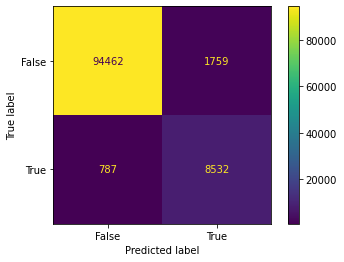

In [ ]:
# confusion_matrix
plot_confusion_matrix(classifier.fit(X_train, y_train), X_test, y_test)
plt.show()

# **Hyper-parameter tuning**

**logistics model**

In [ ]:
# define logistic model
classifier = LogisticRegression()
# define evaluation
cv =  StratifiedKFold(n_splits=5,random_state=None,shuffle=False)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'sag']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(classifier, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)

In [ ]:
# show result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9745882409269366
Best Hyperparameters: {'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}


After best parameter after using grid search. We can use this parameter to build a regularized regression model.

In [ ]:
#After gridsearchcv

# Test the logistic regression classifier
classifier = LogisticRegression(C=0.0001, penalty='l2', solver='newton-cg')
# Fit the classifier
classifier.fit(X_train, y_train)

print('Accuracy Score for training data :',accuracy_score(y_train,classifier.predict(X_train)))
print('Accuracy Score for test data :',accuracy_score(y_test, classifier.predict(X_test)))

Accuracy Score for training data : 0.9757995786651346
Accuracy Score for test data : 0.9785484176615501


In [ ]:
#Classification report
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99     96221
        True       0.84      0.94      0.89      9319

    accuracy                           0.98    105540
   macro avg       0.92      0.96      0.94    105540
weighted avg       0.98      0.98      0.98    105540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


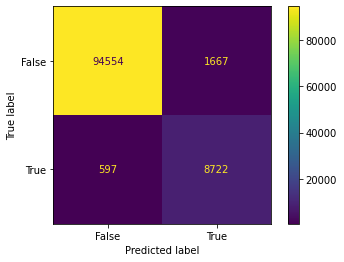

In [ ]:
# confusion_matrix
plot_confusion_matrix(classifier.fit(X_train, y_train), X_test, y_test)
plt.show()

**Naive Bayes**

In [ ]:
#The naive bayes classifier hyperparameter tuning

# define evaluation
cv_method = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

#define model
nb_classifier = GaussianNB()

# define search
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# define search
gs_NB = GridSearchCV(estimator=nb_classifier,
                     param_grid=params_NB,
                     cv=cv_method,
                     verbose=1,
                     scoring='accuracy')



gs_NB.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
# Naive bayes best hyper parameters
print(f'Best Param: {gs_NB.best_params_}')
print(f'Best Score: {gs_NB.best_score_}')

Best Param: {'var_smoothing': 0.657933224657568}
Best Score: 0.9754309106578569


In [ ]:
#Naive Bayes grid search results
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

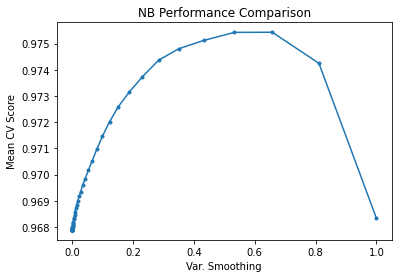

In [ ]:
#Plotting with respect to var_smoothing parameter
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [ ]:
#After gridsearchcv

# Test the naive bayes classifier
nb_classifier = GaussianNB(var_smoothing = 0.657933224657568)
# Fit the classifier
nb_classifier.fit(X_train, y_train)

print('Accuracy Score for training data :',accuracy_score(y_train,nb_classifier.predict(X_train)))
print('Accuracy Score for test data :',accuracy_score(y_test, nb_classifier.predict(X_test)))

Accuracy Score for training data : 0.976283156181174
Accuracy Score for test data : 0.9797328027288232


In [ ]:
#Classification report for Naive bayes
print(classification_report(y_test, nb_classifier.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99     96221
        True       0.86      0.92      0.89      9319

    accuracy                           0.98    105540
   macro avg       0.93      0.95      0.94    105540
weighted avg       0.98      0.98      0.98    105540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


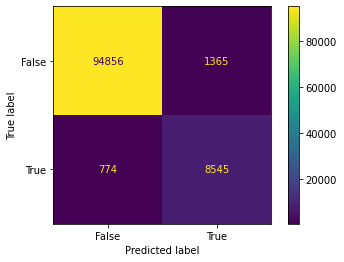

In [ ]:
# confusion_matrix
plot_confusion_matrix(nb_classifier.fit(X_train, y_train), X_test, y_test)
plt.show()

**k-nearest neighbor**

In [ ]:
#The KNN classifier hyperparameter tuning

cv_method = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'p': [1, 2, 5]}

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=params_KNN,
                      cv=cv_method,
                      verbose=1,
                      scoring='accuracy',
                      return_train_score=True)

gs_KNN.fit(X_train, y_train)

In [ ]:
#KNN best hyperparameters
print(gs_KNN.best_params_)
print(gs_KNN.best_score_)

{'n_neighbors': 9, 'p': 5}
0.9711457435602796


In [ ]:
#Results of KNN
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN

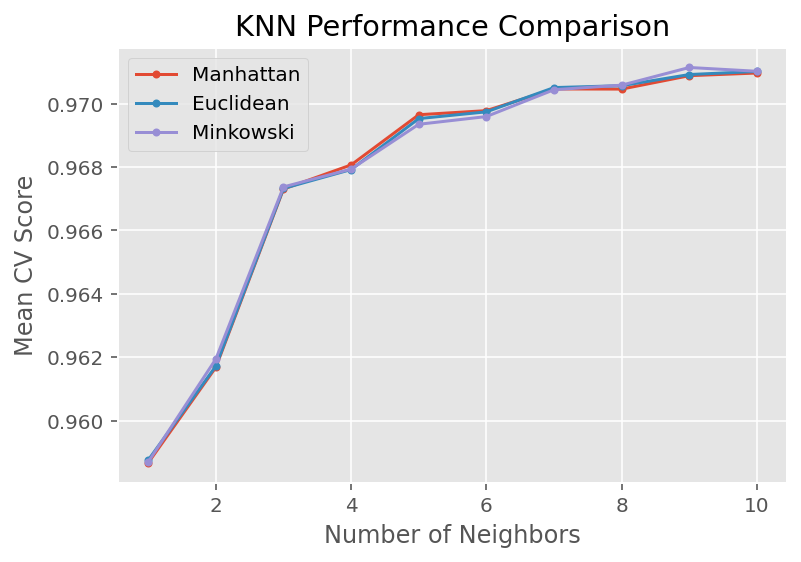

In [ ]:
#Plot KNN Performance Comparison
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

After best parameter after using grid search. We can use these parameters to build a knn model.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors= 9, p= 5)
# Fit the classifier
classifier.fit(X_test, y_test)

print('Accuracy Score for training data :',accuracy_score(y_train,classifier.predict(X_train)))
print('Accuracy Score for test data :',accuracy_score(y_test, classifier.predict(X_test)))

Accuracy Score for training data : 0.9691611605860385
Accuracy Score for test data : 0.9888288800454804


In [ ]:
#Classification report for KNN
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99     96221
        True       0.95      0.93      0.94      9319

    accuracy                           0.99    105540
   macro avg       0.97      0.96      0.97    105540
weighted avg       0.99      0.99      0.99    105540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


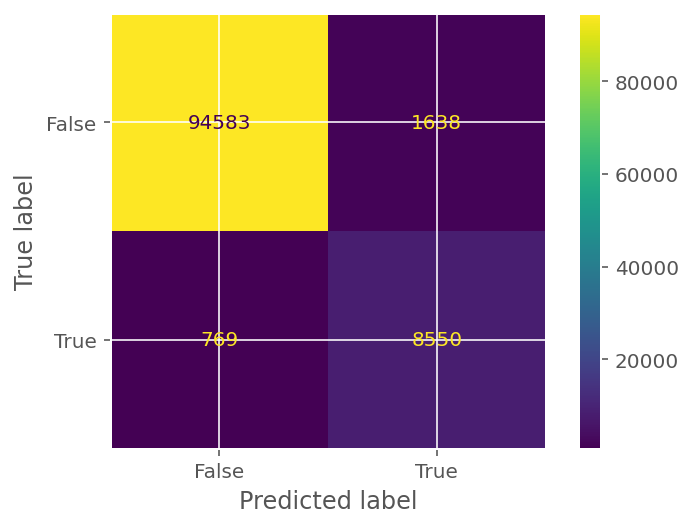

In [ ]:
# confusion_matrix
plot_confusion_matrix(classifier.fit(X_train, y_train), X_test, y_test)
plt.show()

# 4. Given the same training and test data, build three ensemble models for predicting air conditioner status (6 Marks)



**Adaboost Ensemble Model**

In [ ]:
# Test on boost ensemble classifiers

classifier = AdaBoostClassifier(n_estimators=100)

classifier.fit(X_train, y_train)

print('Accuracy Score for training data :',accuracy_score(y_train,classifier.predict(X_train)))
print('Accuracy Score for test data :',accuracy_score(y_test, classifier.predict(X_test)))

Accuracy Score for training data : 0.976924734271761
Accuracy Score for test data : 0.981931021413682


In [ ]:
#Classification report for Adaboost
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99     96221
        True       0.89      0.91      0.90      9319

    accuracy                           0.98    105540
   macro avg       0.94      0.95      0.94    105540
weighted avg       0.98      0.98      0.98    105540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


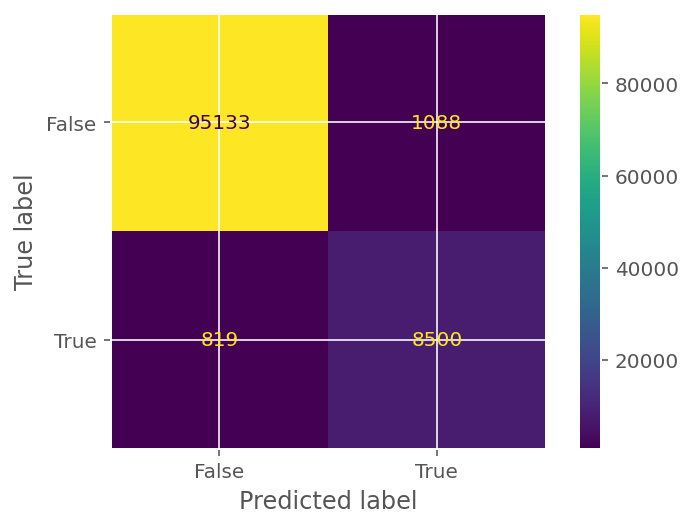

In [ ]:
# confusion_matrix
plot_confusion_matrix(classifier.fit(X_train, y_train), X_test, y_test)
plt.show()

**Random Forest Model**

In [ ]:
# making predictions with the Random Forest model ensemble

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print('Accuracy Score for training data :',accuracy_score(y_train,rfc.predict(X_train)))
print('Accuracy Score for test data :',accuracy_score(y_test, rfc.predict(X_test)))

Accuracy Score for training data : 0.999382361390405
Accuracy Score for test data : 0.9738772029562252


In [ ]:
#Classification report for random forest
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99     96221
        True       0.81      0.92      0.86      9319

    accuracy                           0.97    105540
   macro avg       0.90      0.95      0.92    105540
weighted avg       0.98      0.97      0.97    105540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


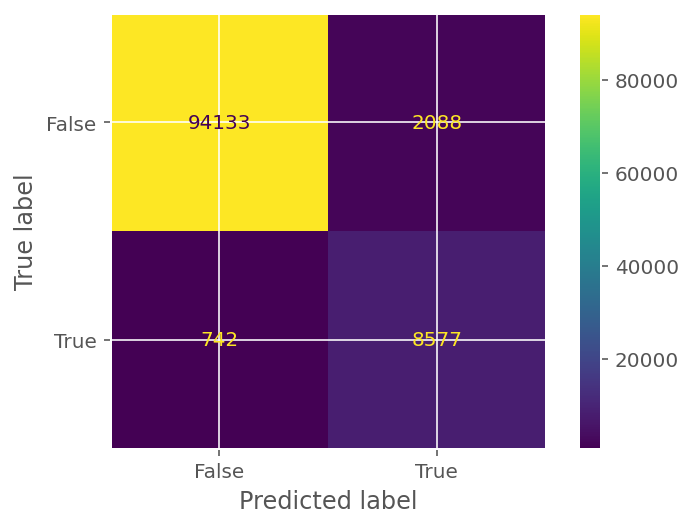

In [ ]:
# confusion_matrix
plot_confusion_matrix(rfc.fit(X_train, y_train), X_test, y_test)
plt.show()

**Ensemble Voting Classifier model**

In [ ]:
# making predictions with the logistic regression model
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# making predictions with the naive bayes model
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# making predictions with the k-nearesr neighbor model
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# evaluating the models based on their f-1 scores
f1_lr = f1_score(y_test, y_pred_lr)
f1_gnb = f1_score(y_test, y_pred_gnb)
f1_knn = f1_score(y_test, y_pred_gnb)

# print the f-1 scores
print('F1-score of logistic: {}'.format(np.round(f1_lr,4)))
print('F1-score of naive bayes: {}'.format(np.round(f1_gnb,4)))
print('F1-score of k-nearest neighbor classifier: {}'.format(np.round(f1_knn,4)))
print('*'*100)
# print the accuracy score
print('Accuracy Score for logistics test data :',accuracy_score(y_test, y_pred_lr))
print('Accuracy Score for naive bayes test data :',accuracy_score(y_test, y_pred_gnb))
print('Accuracy Score for k-neigbors test data :',accuracy_score(y_test, y_pred_knn))

F1-score of logistic: 0.8871
F1-score of naive bayes: 0.8744
F1-score of k-nearest neighbor classifier: 0.8744
****************************************************************************************************
Accuracy Score for logistics test data : 0.9789937464468448
Accuracy Score for naive bayes test data : 0.9757816941444002
Accuracy Score for k-neigbors test data : 0.9758764449497821


In [ ]:
# create a voting classifier with hard voting
voting_classifier_hard = VotingClassifier(
    estimators = [('lr', LogisticRegression()),
                  ('gnb', GaussianNB()),
                  ('knn', KNeighborsClassifier())],
    voting='hard')

# create a voting classifier with soft voting
voting_classifier_soft = VotingClassifier(
    estimators = [('lr', LogisticRegression()),
                  ('gnb', GaussianNB()),
                  ('knn', KNeighborsClassifier())],
    voting='soft')

# make predictions with the hard voting model
voting_classifier_hard.fit(X_train, y_train)
y_pred_vch = voting_classifier_hard.predict(X_test)

# make predictions with the soft voting model
voting_classifier_soft.fit(X_train, y_train)
y_pred_vcs = voting_classifier_soft.predict(X_test)

# evaluate both models with the f-1 score
f1_vch = f1_score(y_test, y_pred_vch)
f1_vcs = f1_score(y_test, y_pred_vcs)

# print the f-1 scores
print('F1-score of the hard voting classifier: {}'.format(np.round(f1_vch,4)))
print('F1-score of the soft voting classifier: {}'.format(np.round(f1_vcs,4)))
print('*'*100)
# print the accuracy score
print('Accuracy Score for hard voting classifier:',accuracy_score(y_test, y_pred_vch))
print('Accuracy Score for  soft voting classifier:',accuracy_score(y_test, y_pred_vcs))

F1-score of the hard voting classifier: 0.8853
F1-score of the soft voting classifier: 0.8832
****************************************************************************************************
Accuracy Score for hard voting classifier: 0.978387341292401
Accuracy Score for  soft voting classifier: 0.9778662118628009


In [ ]:
# Classification report for hard voting

print(classification_report(y_test, y_pred_vch))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99     96221
        True       0.83      0.94      0.89      9319

    accuracy                           0.98    105540
   macro avg       0.91      0.96      0.94    105540
weighted avg       0.98      0.98      0.98    105540



In [ ]:
# Classification report for soft voting

print(classification_report(y_test, y_pred_vcs))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99     96221
        True       0.83      0.95      0.88      9319

    accuracy                           0.98    105540
   macro avg       0.91      0.96      0.94    105540
weighted avg       0.98      0.98      0.98    105540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


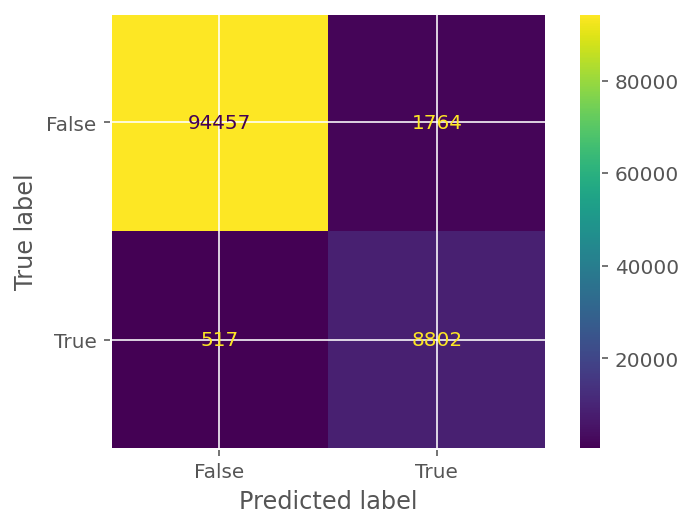

In [ ]:
# confusion_matrix for hard voting
plot_confusion_matrix(voting_classifier_hard.fit(X_train, y_train), X_test, y_test)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


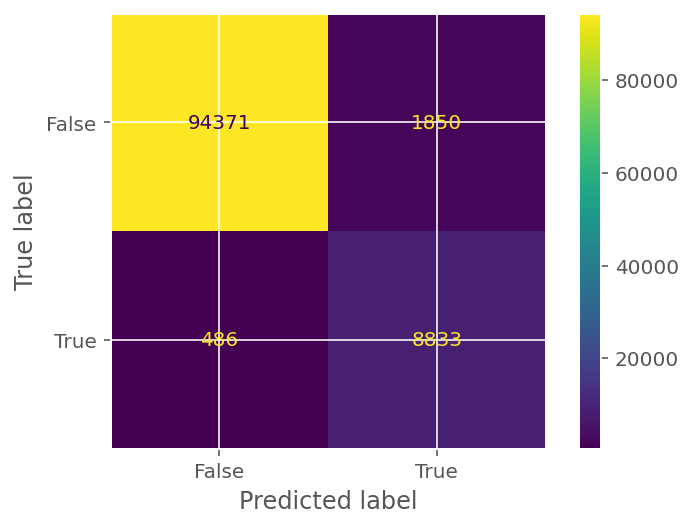

In [ ]:
# confusion_matrix for soft voting
plot_confusion_matrix(voting_classifier_soft.fit(X_train, y_train), X_test, y_test)
plt.show()